<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

**Note: This does not actually appear to be a heart disease prediction problem (based on the data set), but rather a blood donor prediction problem**

* Can we accurately predict whether someone has donated blood in the blood transfusion service center data set?


## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
## Import Libraries
import itertools
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, auc, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
bt = pd.read_csv('blood_transfusion.csv')
print(bt.dtypes)
bt.head()

V1       int64
V2       int64
V3       int64
V4       int64
Class    int64
dtype: object


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
pd.DataFrame(zip(bt.columns, bt.dtypes, bt.isnull().sum()), columns=['feature', 'dtype', 'null_count'])

,feature,dtype,null_count
0,V1,int64,0
1,V2,int64,0
2,V3,int64,0
3,V4,int64,0
4,Class,int64,0


In [4]:
bt.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Mar_2007']
print(bt.dtypes)
bt.head()

Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [5]:
bt.describe()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [6]:
bt.head()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


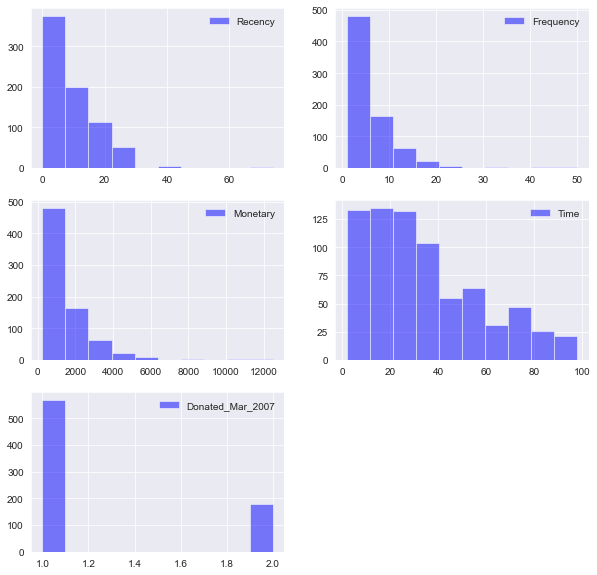

In [7]:
col_mean = []
ncols = 2
nrows = int(np.ceil(len(bt.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        # Plot when we have data
        if counter < len(bt.drop(col_mean, axis=1).columns):
            ax.hist(bt[bt.drop(col_mean, axis=1).columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(bt.drop(col_mean, axis=1).columns[counter]))
            leg = ax.legend()
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        counter += 1

plt.show();

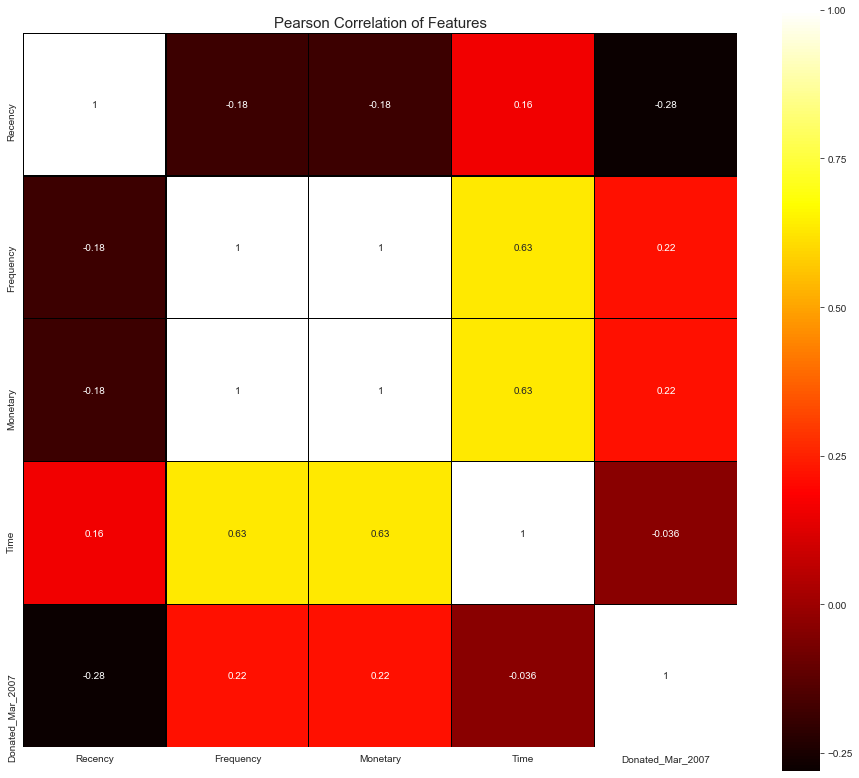

In [8]:
colormap = plt.cm.hot
plt.figure(figsize = (16, 14))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(bt.corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'black',
            annot = True)
plt.show();

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [9]:
round(bt['Donated_Mar_2007'].value_counts(normalize=True) * 100, 1)

1    76.2
2    23.8
Name: Donated_Mar_2007, dtype: float64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? everything that's not 'whether he/she donated blood in March 2007'
- Is there an output variable (label)? Yes
- If there is an output variable:
    - What is it? whether he/she donated blood in March 2007
    - What is its type? int
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [11]:
y = bt['Donated_Mar_2007']
X = bt[[col for col in bt.columns if col != 'Donated_Mar_2007']]

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
print(scaler.mean_)

[   9.50668449    5.51470588 1378.67647059   34.28208556]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

In [13]:
y_train.value_counts()

1    447
2    151
Name: Donated_Mar_2007, dtype: int64

In [14]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [15]:
np.random.seed(0)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Step 9: Fit the Model

In [16]:
label = ['Decision Tree']
clf_list = [clf]

grid = itertools.product([0, 1], repeat = 2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.4f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    
    clf.fit(X_train, y_train)
    print('{}: '.format(label))
    print(clf.predict(X_train)[0:5])

Accuracy: 0.7525 (+/- 0.01) [Decision Tree]
Decision Tree: 
[1 1 1 1 2]


# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [17]:
label = ['Decision Tree']
clf_list = [clf]

grid = itertools.product([0, 1], repeat = 2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.4f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    
    clf.fit(X_train, y_train)
    print('{}: '.format(label))
    print(clf.predict(X_train)[0:5])

Accuracy: 0.7525 (+/- 0.01) [Decision Tree]
Decision Tree: 
[1 1 1 1 2]


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [18]:
label = ['Decision Tree']
clf_list = [clf]

grid = itertools.product([0, 1], repeat = 2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    print('Accuracy (train): %.4f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    
    clf.fit(X_train, y_train)
    print('%s score (test): %.4f' % (label, clf.score(X_test, y_test)))
    print(clf.predict(X_test)[0:5], '\n')

Accuracy (train): 0.7558 (+/- 0.03) [Decision Tree]
Decision Tree score (test): 0.8200
[1 1 1 1 2] 



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

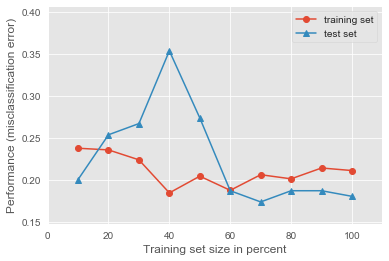

In [19]:
# plot learning curves
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, clf, print_model = False, style = 'ggplot')
plt.show()

In [20]:
show_summary_report(y_test, clf.predict(X_test))

Accuracy : 0.8200 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8810 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9024 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6734                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


ValueError: Data is not binary and pos_label is not specified

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



